In [ ]:
# This makes a plot in the style of Fig. 1 in Pancino+ 2015, to 
# give readers a sense of the phase coverage of our program stars.

# created 2019 July 1 by E.S.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
# all program stars

cases = ["RW Ari", "X Ari", "UY Cam", 
         "RR Cet", "SV Eri", "VX Her", 
         "RR Leo", "TT Lyn", "TV Lyn", 
         "TW Lyn", "RR Lyr", "V535 Mon", 
         "V445 Oph", "AV Peg", "BH Peg", 
         "AR Per", "RU Psc", "T Sex", 
         "TU UMa", "All RRabs", "All RRcs"]

In [3]:
bad_phase_region = [0.90,0.05]
greyness_alpha = 0.3

In [4]:
cols = 3
rows = 7

In [5]:
# set the spacing between axes

#gs1 = gridspec.GridSpec(rows, cols)
#gs1.update(wspace=0.0, hspace=0.05) 

In [6]:
# define a normalization function

def normalize_curve(df_unnorm, mag_already = False):
    '''
    Takes an unnormalized light curve (in flux units), turns it into delta_m, and and normalizes it
    
    mag_already: if true, then input is already in mags and we just need to normalize it
    '''

    if mag_already:
        y_del_mag = np.copy(df_unnorm["mag"])
    else:
        y_del_mag = -2.5*np.log10(df_unnorm["flux"])
    
    y_mag_unnorm_offset = np.subtract(y_del_mag,np.min(y_del_mag))
    
    df_unnorm["y_mag_norm"] = np.divide(y_mag_unnorm_offset,np.max(y_mag_unnorm_offset))
    
    return df_unnorm

In [16]:
# read in data
df_phases = pd.read_csv("./data/final_phases_ndl_and_me.csv")

# read in lightcurves
df_rw_ari = pd.read_csv("./data/phase_folded_curves/Phased_RW_Ari.dat", 
                        names=["epoch","flux"], delim_whitespace=True)
df_bh_peg = pd.read_csv("./data/phase_folded_curves/Phased_BH_Peg_aavso.dat", 
                        names=["phase","mag"], delim_whitespace=True)
df_rr_cet = pd.read_csv("./data/phase_folded_curves/Phased_RR_Cet.dat", 
                        names=["epoch","flux"], delim_whitespace=True)
df_sv_eri = pd.read_csv("./data/phase_folded_curves/Phased_SV_Eri.dat", 
                        names=["epoch","flux"], delim_whitespace=True)
df_x_ari = pd.read_csv("./data/phase_folded_curves/Phased_X_Ari.dat", 
                       names=["epoch","flux"], delim_whitespace=True)
df_t_sex = pd.read_csv("./data/phase_folded_curves/T_Sex_phased.dat", 
                       names=["epoch","flux"], delim_whitespace=True)

df_uy_cam = pd.read_csv("./data/phase_folded_curves/Phased_UY_Cam.dat", 
                        names=["epoch","flux"], delim_whitespace=True)
df_v535_mon = pd.read_csv("./data/phase_folded_curves/Phased_V0535_Mon.dat", 
                          names=["epoch","flux"], delim_whitespace=True)
df_tt_lyn = pd.read_csv("./data/phase_folded_curves/Phased_TT_Lyn.dat", 
                          names=["epoch","flux"], delim_whitespace=True)
df_tv_lyn = pd.read_csv("./data/phase_folded_curves/Phased_TV_Lyn.dat", 
                          names=["epoch","flux"], delim_whitespace=True)
df_rr_leo = pd.read_csv("./data/phase_folded_curves/Phased_RR_Leo.dat", 
                          names=["epoch","flux"], delim_whitespace=True)
df_rr_lyr = pd.read_csv("./data/phase_folded_curves/Phased_RR_Lyr.dat", 
                          names=["epoch","flux"], delim_whitespace=True)
df_tw_lyn = pd.read_csv("./data/phase_folded_curves/Phased_TW_Lyn.dat", 
                          names=["epoch","flux"], delim_whitespace=True)
df_tu_uma = pd.read_csv("./data/phase_folded_curves/Phased_TU_UMa.dat", 
                          names=["epoch","flux"], delim_whitespace=True)

#df_ru_psc = pd.read_csv("./data/phase_folded_curves/RU_Psc_E.cur",names=["epoch","flux","error"], delim_whitespace=True)
#df_ru_psc["epoch"] = df_ru_psc["phase"]

df_v445_oph = pd.read_csv("./data/phase_folded_curves/V445_Oph_E.cur_1.spl", 
                          names=["phase","mag"], skiprows=1)
df_av_peg = pd.read_csv("./data/phase_folded_curves/AV_Peg_E.cur_1.spl", 
                          names=["phase","mag"], skiprows=1)
df_ar_per = pd.read_csv("./data/phase_folded_curves/AR_Per_E.cur_1.spl", 
                          names=["phase","mag"], skiprows=1)
df_ru_psc = pd.read_csv("./data/phase_folded_curves/RU_Psc_W.cur_1.spl", 
                          names=["phase","mag"], skiprows=1)

In [17]:
idx_rw_ari = df_phases["star_match"] == "RW Ari"
idx_rr_cet = df_phases["star_match"] == "RR Cet"
idx_sv_eri = df_phases["star_match"] == "SV Eri"
idx_x_ari = df_phases["star_match"] == "X Ari"
idx_t_sex = df_phases["star_match"] == "T Sex"
idx_uy_cam = df_phases["star_match"] == "UY Cam"
idx_v535_mon = df_phases["star_match"] == "V535 M"
idx_tt_lyn = df_phases["star_match"] == "TT Lyn"
idx_tv_lyn = df_phases["star_match"] == "TV Lyn"
idx_rr_leo = df_phases["star_match"] == "RR Leo"
idx_rr_lyr = df_phases["star_match"] == "RR Lyr"
idx_tw_lyn = df_phases["star_match"] == "TW Lyn"
idx_tu_uma = df_phases["star_match"] == "TU UMa"
idx_ru_psc = df_phases["star_match"] == "RU Psc"
idx_v445_oph = df_phases["star_match"] == "V445 O"
idx_av_peg = df_phases["star_match"] == "AV Peg"
idx_ar_per = df_phases["star_match"] == "AR Per"
idx_bh_peg = df_phases["star_match"] == "BH Peg"


In [18]:
# normalize

df_rw_ari = normalize_curve(df_rw_ari)
df_rr_cet = normalize_curve(df_rr_cet)
df_sv_eri = normalize_curve(df_sv_eri)
df_x_ari = normalize_curve(df_x_ari)
df_t_sex = normalize_curve(df_t_sex)
df_uy_cam = normalize_curve(df_uy_cam)
df_v535_mon = normalize_curve(df_v535_mon)
df_tv_lyn = normalize_curve(df_tv_lyn)
df_tt_lyn = normalize_curve(df_tt_lyn)
df_rr_leo = normalize_curve(df_rr_leo)
df_rr_lyr = normalize_curve(df_rr_lyr)
df_tw_lyn = normalize_curve(df_tw_lyn)
df_tu_uma = normalize_curve(df_tu_uma)


df_v445_oph = normalize_curve(df_v445_oph, mag_already = True)
df_av_peg = normalize_curve(df_av_peg, mag_already = True)
df_ar_per = normalize_curve(df_ar_per, mag_already = True)
df_ru_psc = normalize_curve(df_ru_psc, mag_already = True)
df_bh_peg = normalize_curve(df_bh_peg, mag_already = True)

In [20]:
# fake data

example_phase_epochs_star_1 = [0.1,0.45,0.77,0.98]
x = np.linspace(0,1.,num=50)
y = np.sin(x)

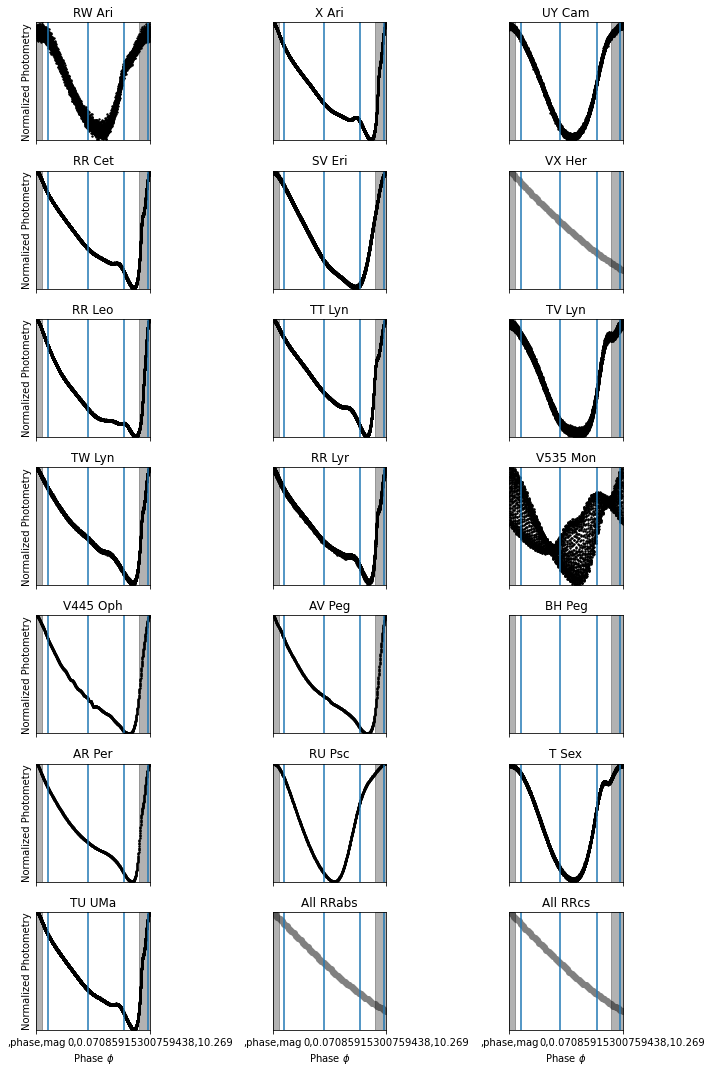

In [21]:
# used some code from 
# https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(rows, cols, figsize = (10, 15), sharex=True, sharey=True)

# RW Ari
axs[0, 0].scatter(df_rw_ari["epoch"],df_rw_ari["y_mag_norm"], color="k", s=2)
axs[0, 0].set_title(cases[0])
[axs[0, 0].axvline(i) for i in example_phase_epochs_star_1]
axs[0, 0].set_xlim([0,1.0])
axs[0, 0].set_ylim([0,1.0])
axs[0, 0].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[0, 0].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# X Ari
axs[0, 1].scatter(df_x_ari["epoch"],df_x_ari["y_mag_norm"], color="k", s=2)
axs[0, 1].set_title(cases[1])
[axs[0, 1].axvline(i) for i in example_phase_epochs_star_1]
axs[0, 1].set_xlim([0,1.0])
axs[0, 1].set_ylim([0,1.0])
axs[0, 1].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[0, 1].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# UY Cam
axs[0, 2].scatter(df_uy_cam["epoch"], df_uy_cam["y_mag_norm"], color="k", s=2)
axs[0, 2].set_title(cases[2])
[axs[0, 2].axvline(i) for i in example_phase_epochs_star_1]
axs[0, 2].set_xlim([0,1.0])
axs[0, 2].set_ylim([0,1.0])
axs[0, 2].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[0, 2].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# RR Cet
axs[1, 0].scatter(df_rr_cet["epoch"], df_rr_cet["y_mag_norm"], color="k", s=2)
axs[1, 0].set_title(cases[3])
[axs[1, 0].axvline(i) for i in example_phase_epochs_star_1]
axs[1, 0].set_xlim([0,1.0])
axs[1, 0].set_ylim([0,1.0])
axs[1, 0].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[1, 0].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# SV Eri
axs[1, 1].scatter(df_sv_eri["epoch"], df_sv_eri["y_mag_norm"], color="k", s=2)
axs[1, 1].set_title(cases[4])
[axs[1, 1].axvline(i) for i in example_phase_epochs_star_1]
axs[1, 1].set_xlim([0,1.0])
axs[1, 1].set_ylim([0,1.0])
axs[1, 1].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[1, 1].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# VX Her
axs[1, 2].scatter(x, y, color="gray")
axs[1, 2].set_title(cases[5])
[axs[1, 2].axvline(i) for i in example_phase_epochs_star_1]
axs[1, 2].set_xlim([0,1.0])
axs[1, 2].set_ylim([0,1.0])
axs[1, 2].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[1, 2].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# RR Leo
axs[2, 0].scatter(df_rr_leo["epoch"], df_rr_leo["y_mag_norm"], color="k", s=2)
axs[2, 0].set_title(cases[6])
[axs[2, 0].axvline(i) for i in example_phase_epochs_star_1]
axs[2, 0].set_xlim([0,1.0])
axs[2, 0].set_ylim([0,1.0])
axs[2, 0].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[2, 0].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# TT Lyn
axs[2, 1].scatter(df_tt_lyn["epoch"], df_tt_lyn["y_mag_norm"], color="k", s=2)
axs[2, 1].set_title(cases[7])
[axs[2, 1].axvline(i) for i in example_phase_epochs_star_1]
axs[2, 1].set_xlim([0,1.0])
axs[2, 1].set_ylim([0,1.0])
axs[2, 1].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[2, 1].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# TV Lyn
axs[2, 2].scatter(df_tv_lyn["epoch"], df_tv_lyn["y_mag_norm"], color="k", s=2)
axs[2, 2].set_title(cases[8])
[axs[2, 2].axvline(i) for i in example_phase_epochs_star_1]
axs[2, 2].set_xlim([0,1.0])
axs[2, 2].set_ylim([0,1.0])
axs[2, 2].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[2, 2].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# TW Lyn
axs[3, 0].scatter(df_tw_lyn["epoch"], df_tw_lyn["y_mag_norm"], color="k", s=2)
axs[3, 0].set_title(cases[9])
[axs[3, 0].axvline(i) for i in example_phase_epochs_star_1]
axs[3, 0].set_xlim([0,1.0])
axs[3, 0].set_ylim([0,1.0])
axs[3, 0].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[3, 0].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# RR Lyr
axs[3, 1].scatter(df_rr_lyr["epoch"], df_rr_lyr["y_mag_norm"], color="k", s=2)
axs[3, 1].set_title(cases[10])
[axs[3, 1].axvline(i) for i in example_phase_epochs_star_1]
axs[3, 1].set_xlim([0,1.0])
axs[3, 1].set_ylim([0,1.0])
axs[3, 1].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[3, 1].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# V535 Mon
axs[3, 2].scatter(df_v535_mon["epoch"], df_v535_mon["y_mag_norm"], color="k", s=2)
axs[3, 2].set_title(cases[11])
[axs[3, 2].axvline(i) for i in example_phase_epochs_star_1]
axs[3, 2].set_xlim([0,1.0])
axs[3, 2].set_ylim([0,1.0])
axs[3, 2].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[3, 2].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# V445 Oph
axs[4, 0].scatter(df_v445_oph["phase"], df_v445_oph["y_mag_norm"], color="k", s=2)
axs[4, 0].set_title(cases[12])
[axs[4, 0].axvline(i) for i in example_phase_epochs_star_1]
axs[4, 0].set_xlim([0,1.0])
axs[4, 0].set_ylim([0,1.0])
axs[4, 0].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[4, 0].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# AV Peg
axs[4, 1].scatter(df_av_peg["phase"], df_av_peg["y_mag_norm"], color="k", s=2)
axs[4, 1].set_title(cases[13])
[axs[4, 1].axvline(i) for i in example_phase_epochs_star_1]
axs[4, 1].set_xlim([0,1.0])
axs[4, 1].set_ylim([0,1.0])
axs[4, 1].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[4, 1].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# BH Peg
axs[4, 2].scatter(df_bh_peg["phase"], df_bh_peg["y_mag_norm"], color="k", s=2)
axs[4, 2].set_title(cases[14])
[axs[4, 2].axvline(i) for i in example_phase_epochs_star_1]
axs[4, 2].set_xlim([0,1.0])
axs[4, 2].set_ylim([0,1.0])
axs[4, 2].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[4, 2].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# AR Per
axs[5, 0].scatter(df_ar_per["phase"], df_ar_per["y_mag_norm"], color="k", s=2)
axs[5, 0].set_title(cases[15])
[axs[5, 0].axvline(i) for i in example_phase_epochs_star_1]
axs[5, 0].set_xlim([0,1.0])
axs[5, 0].set_ylim([0,1.0])
axs[5, 0].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[5, 0].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# RU Psc
axs[5, 1].scatter(df_ru_psc["phase"], df_ru_psc["y_mag_norm"], color="k", s=2)
axs[5, 1].set_title(cases[16])
[axs[5, 1].axvline(i) for i in example_phase_epochs_star_1]
axs[5, 1].set_xlim([0,1.0])
axs[5, 1].set_ylim([0,1.0])
axs[5, 1].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[5, 1].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# T Sex
axs[5, 2].scatter(df_t_sex["epoch"], df_t_sex["y_mag_norm"], color="k", s=2)
axs[5, 2].set_title(cases[17])
[axs[5, 2].axvline(i) for i in example_phase_epochs_star_1]
axs[5, 2].set_xlim([0,1.0])
axs[5, 2].set_ylim([0,1.0])
axs[5, 2].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[5, 2].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# TU UMa
axs[6, 0].scatter(df_tu_uma["epoch"], df_tu_uma["y_mag_norm"], color="k", s=2)
axs[6, 0].set_title(cases[18])
[axs[6, 0].axvline(i) for i in example_phase_epochs_star_1]
axs[6, 0].set_xlim([0,1.0])
axs[6, 0].set_ylim([0,1.0])
axs[6, 0].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[6, 0].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# All RRabs
axs[6, 1].scatter(x, y, color="gray")
axs[6, 1].set_title(cases[19])
[axs[6, 1].axvline(i) for i in example_phase_epochs_star_1]
axs[6, 1].set_xlim([0,1.0])
axs[6, 1].set_ylim([0,1.0])
axs[6, 1].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[6, 1].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

# All RRcs
axs[6, 2].scatter(x, y, color="gray")
axs[6, 2].set_title(cases[20])
[axs[6, 2].axvline(i) for i in example_phase_epochs_star_1]
axs[6, 2].set_xlim([0,1.0])
axs[6, 2].set_ylim([0,1.0])
axs[6, 2].axvspan(0, bad_phase_region[1], color="k", alpha=greyness_alpha)
axs[6, 2].axvspan(bad_phase_region[0], 1, color="k", alpha=greyness_alpha)

for ax in axs.flat:
    ax.set(xlabel="Phase $\phi$", ylabel="Normalized Photometry")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
axs[0, 0].invert_yaxis()
axs[0, 1].invert_yaxis()
axs[0, 2].invert_yaxis()
axs[1, 0].invert_yaxis()
axs[1, 1].invert_yaxis()
axs[1, 2].invert_yaxis()
axs[2, 0].invert_yaxis()
axs[2, 1].invert_yaxis()
axs[2, 2].invert_yaxis()
axs[3, 0].invert_yaxis()
axs[3, 1].invert_yaxis()
axs[3, 2].invert_yaxis()
axs[4, 0].invert_yaxis()
axs[4, 1].invert_yaxis()
axs[4, 2].invert_yaxis()
axs[5, 0].invert_yaxis()
axs[5, 1].invert_yaxis()
axs[5, 2].invert_yaxis()
axs[6, 0].invert_yaxis()
axs[6, 1].invert_yaxis()
axs[6, 2].invert_yaxis()

axs[0, 0].set_yticks([])
 
plt.tight_layout()
plt.savefig("test.pdf")
